In [ ]:
!unzip '/content/drive/My Drive/Copy of shopee-product-detection-dataset.zip' -d .

Streaming output truncated to the last 5000 lines.
  inflating: ./train/train/40/238399dc6718dfb872962b649c5b8b83.jpg  
  inflating: ./train/train/40/23a2c307f8a05a1e21eb32f56e101ed9.jpg  
  inflating: ./train/train/40/23ad693e18e097185d1244374ba769cc.jpg  
  inflating: ./train/train/40/23bd6cca1e919689206f92388b44d325.jpg  
  inflating: ./train/train/40/23c7beac3cdafe529351114903c59fce.jpg  
  inflating: ./train/train/40/23e8212b6432efd9425f3892f4027352.jpg  
  inflating: ./train/train/40/23ff069da9e694541c35444ebc7f21a7.jpg  
  inflating: ./train/train/40/2418076cb2f41c86fa1e91b385768093.jpg  
  inflating: ./train/train/40/2437204a3cfe46b863373820961d0d46.jpg  
  inflating: ./train/train/40/24378c3a9bf723b99e05757fedb1ea87.jpg  
  inflating: ./train/train/40/243794ebb1e40d23766b818ab8aefb87.jpg  
  inflating: ./train/train/40/243b97396484342838071f927958b010.jpg  
  inflating: ./train/train/40/244afd9ab1567d9dfe06b5ed098c0f60.jpg  
  inflating: ./train/train/40/24795c07a2ff098234ee1e

In [ ]:
# !pip install fastai

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
IMG_PATH = '/content/train/'

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
tfms = get_transforms()
data = (ImageDataBunch.from_folder(IMG_PATH, ds_tfms=tfms, size=224, valid_pct=0.2).\
       normalize(imagenet_stats))

In [ ]:
# number of classes
data.c

42

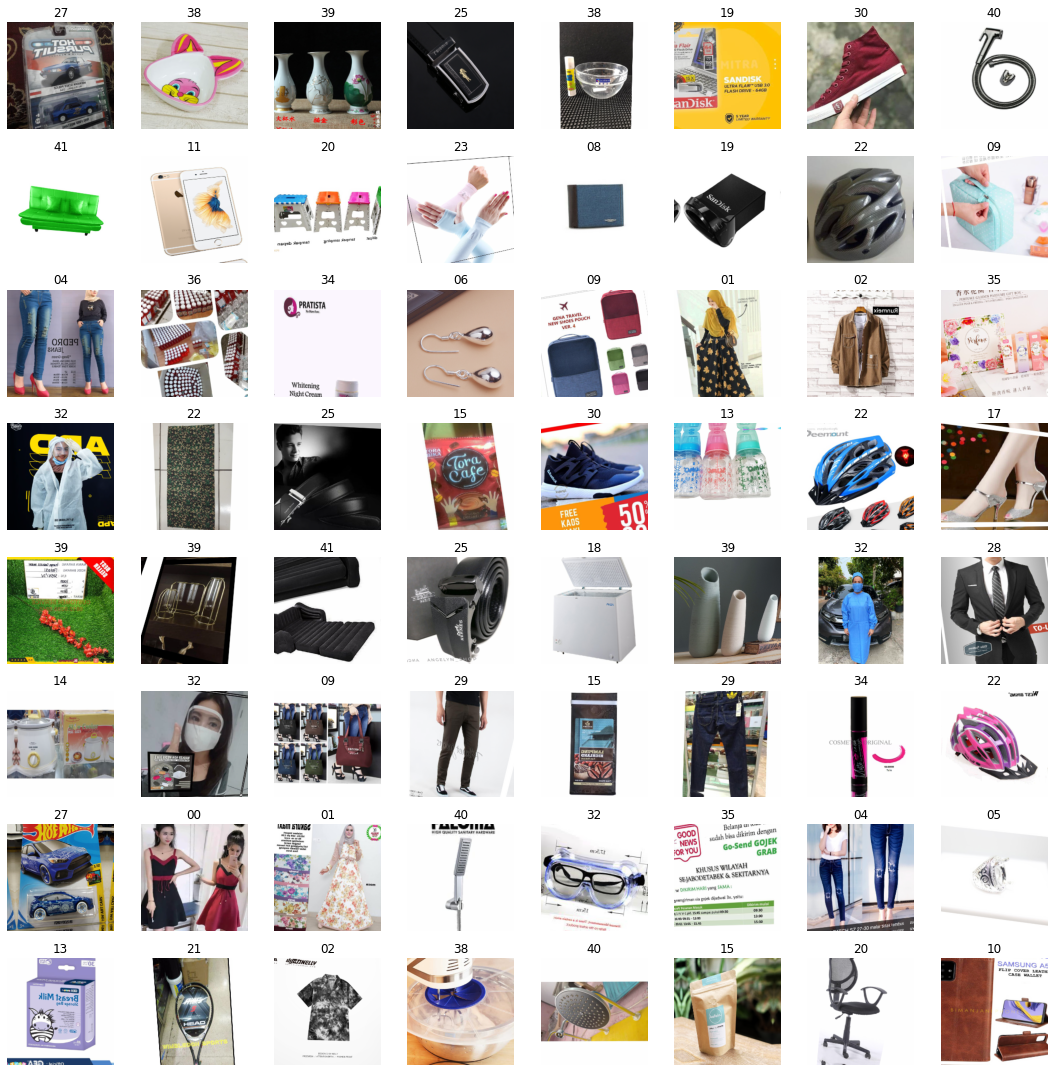

In [ ]:
data.show_batch(rows=15, figsize=(15,15))

In [ ]:
#mixup is used for additional Augumentation
learn = cnn_learner(data, models.resnet50, metrics=accuracy).mixup()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
# learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.130616,1.230096,0.671790,55:19
1,1.894657,1.062416,0.718759,55:26
2,1.792377,0.986090,0.740440,55:25
3,1.759739,0.965548,0.744188,55:21


In [ ]:
# learn.save('/content/drive/My Drive/shopee_image_classification/stage-1')

In [ ]:
learn.load('/content/drive/My Drive/shopee_image_classification/stage-4')
learn.freeze_to(-10)
learn.lr_find()
learn.recorder.plot(suggestion=True)

Learner(data=ImageDataBunch;

Train: LabelList (84314 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
08,08,08,08,08
Path: /content/train;

Valid: LabelList (21078 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
39,25,10,13,26
Path: /content/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Con

In [ ]:
# learn.unfreeze()
learn.freeze_to(-10)
learn.fit_one_cycle(1, max_lr=slice(1e-6,5e-6))
learn.save('/content/drive/My Drive/shopee_image_classification/stage-4')

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
TEST_FOLDER = '/content/test/test/'
#Image Augumentation on train and test

In [ ]:
test['path'] = TEST_FOLDER + test[['filename']]

In [ ]:
from tqdm import tqdm_notebook

In [ ]:
label = []
for ix in tqdm_notebook(range(test.shape[0])):
  file_path = test.loc[ix,'path']
  img=open_image(file_path)
  p = (learn.predict(img))[0]
  label.append(int(p))
  

In [ ]:
test['category'] = [str(i).zfill(2) for i in label]

In [ ]:
test[['filename','category']].to_csv('submission.csv', index=False)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

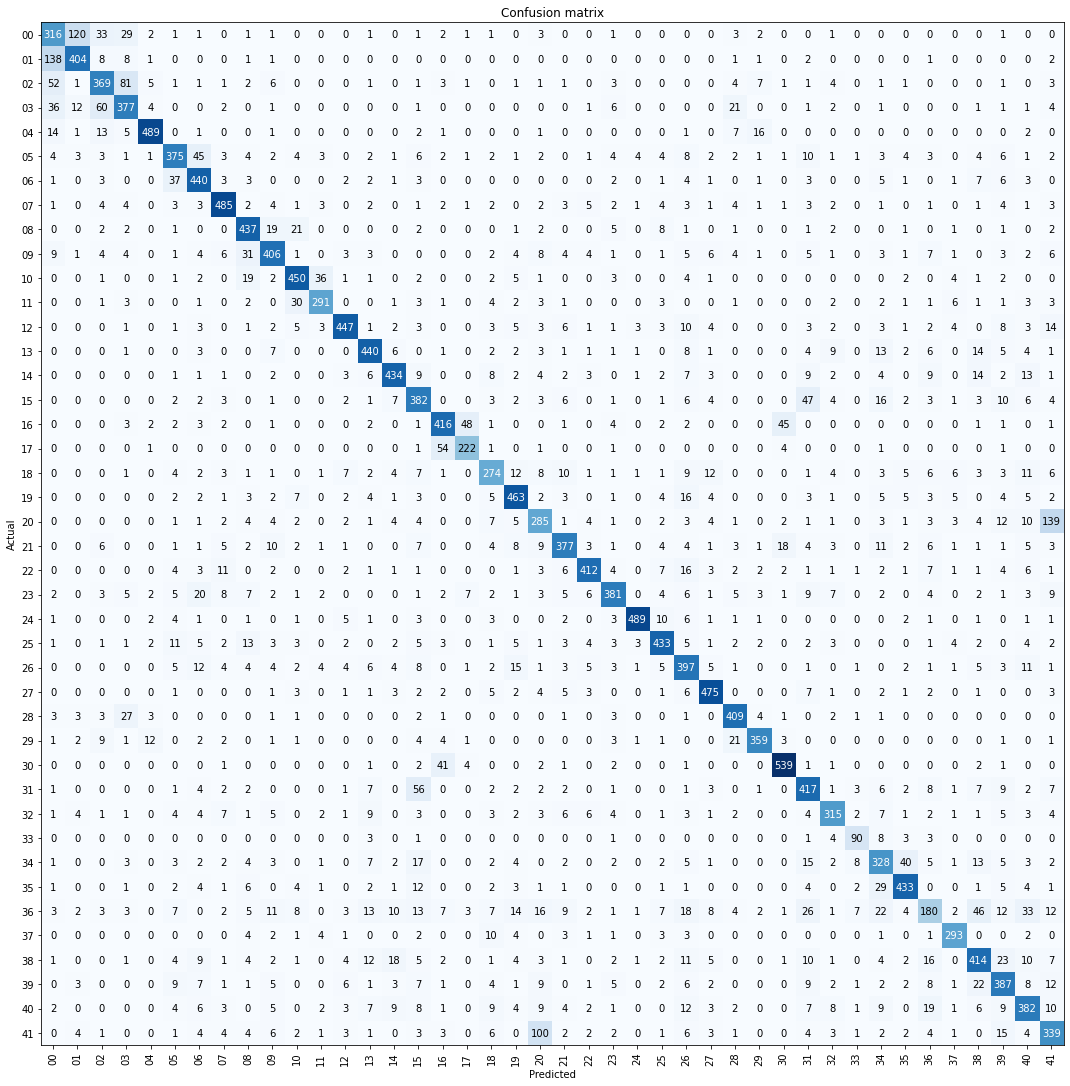

In [ ]:
interp.plot_confusion_matrix(figsize=(15,15))

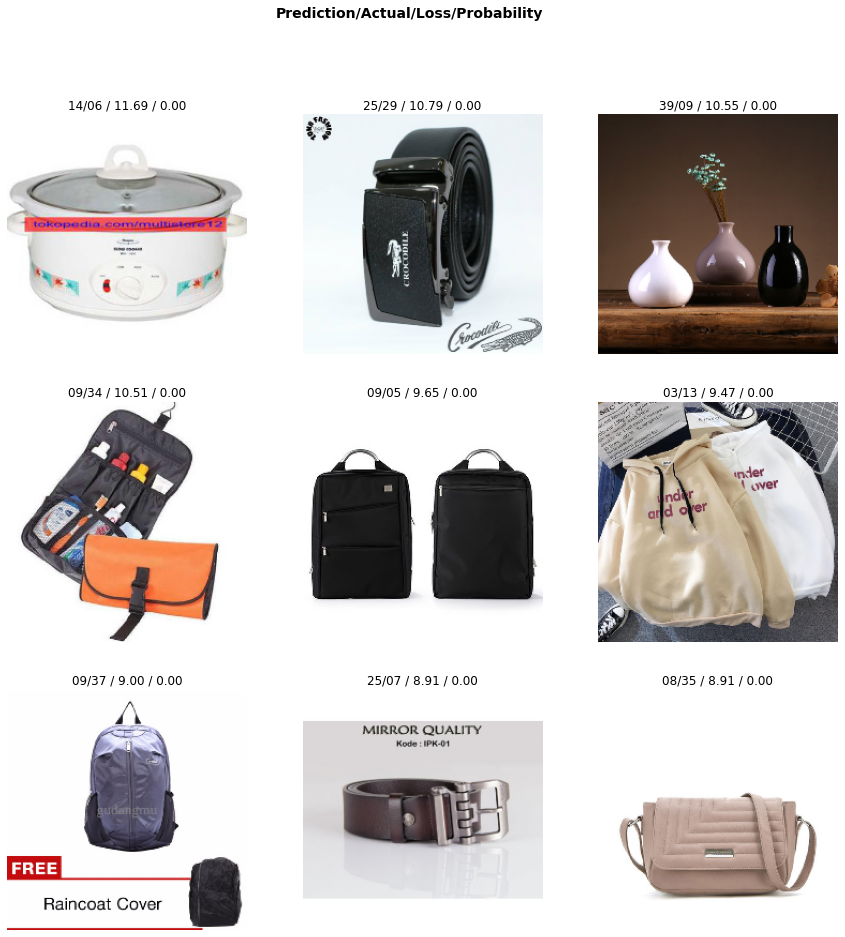

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))